In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data =np.load("./mnist_train_small.npy")

data


array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
data.shape

(19999, 785)

In [ ]:
x=data[:,1:]
y=data[:,0]

In [ ]:
y

array([5, 7, 9, ..., 2, 9, 5], dtype=uint8)

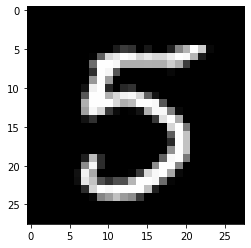

In [ ]:
plt.imshow(x[0].reshape(28,28),cmap="gray");

In [ ]:
y[0]

5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape 

(13399, 784)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model =KNeighborsClassifier()

model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [ ]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [70]:
model.score(X_test,y_test)

0.9542424242424242

In [71]:
a=np.array([1,2,3])

b=np.array([4,5,6])

(a-b)**2



array([9, 9, 9])

## CUSTOM KNN IMPLEMENTATION 

In [88]:
class customKNN:
    def __init__(self,n_neighbors=5):
        self.n_neighbors = n_neighbors
     # training function
    def fit(self,X,y):
        self._X = (X - X.mean()) / X.std()
        self._y = y
    # predict point
    # given a single point, telling which class it belongs to 
    def predict_single_point(self,point):
       # storing the dis of given 'point' from each point in training data
        distances =[]
      # these points are from training data
        for x,y in zip(self._X,self._y):
            dist_point =((point-x)**2).sum()
            distances.append([dist_point,y])

        sorted_distances=sorted(distances)
        top_k=sorted_distances[:self.n_neighbors]
        # taking the count 
        items,counts =np.unique(np.array(top_k)[:,1],return_counts=True)
        ans=items[np.argmax(counts)] 

        return ans
     # To give the answer for each number in the array
    def predict(self,X):

        results=[]
        X = (X - X.mean()) / X.std() 

        for point in X:
            results.append(self.predict_single_point(point))
        
        return np.array(results,dtype=int)

# score to measure my accuracy
    def score(self,X,y):
        return sum(self.predict(X)==y)/(len(y))

In [91]:
test=customKNN()
test.fit(X_train,y_train)

test.predict(X_test[:100])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2, 0, 6, 1, 9, 9, 4, 9, 1, 6, 2, 7, 9,
       9, 2, 4, 4, 5, 6, 0, 5, 9, 0, 8, 7, 9, 0, 2, 3, 8, 8, 3, 7, 0, 9,
       8, 2, 7, 3, 7, 9, 1, 9, 8, 3, 9, 3, 2, 1, 0, 4, 5, 4, 9, 3, 6, 6,
       0, 9, 7, 0, 6, 0, 3, 2, 3, 4, 9, 5, 5, 4, 1, 6, 0, 2, 6, 0, 5, 3,
       3, 1, 8, 0, 6, 9, 5, 9, 2, 0, 3, 1])

In [92]:
test.score(X_test[:100],y_test[:100])


0.95